#### Imports and file loading

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

#### Dataset description and EDA

Let's choose a larger dataset to start from

In [3]:
df = df_por.copy()
df.shape

(649, 33)

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M
age,18,17,15,15,16,16,16,17,15,15
address,U,U,U,U,U,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3
Pstatus,A,T,T,T,T,T,T,A,A,T
Medu,4,1,1,4,3,4,2,4,3,3
Fedu,4,1,1,2,3,3,2,4,2,4
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.nunique().sort_values(ascending=False)

absences      24
G3            17
G1            17
G2            16
age            8
health         5
freetime       5
goout          5
Dalc           5
Walc           5
famrel         5
Fjob           5
Mjob           5
Fedu           5
Medu           5
traveltime     4
studytime      4
failures       4
reason         4
guardian       3
romantic       2
school         2
internet       2
higher         2
nursery        2
activities     2
paid           2
sex            2
schoolsup      2
Pstatus        2
famsize        2
address        2
famsup         2
dtype: int64

Let's look at the correlation matrix of numeric variables

<AxesSubplot:>

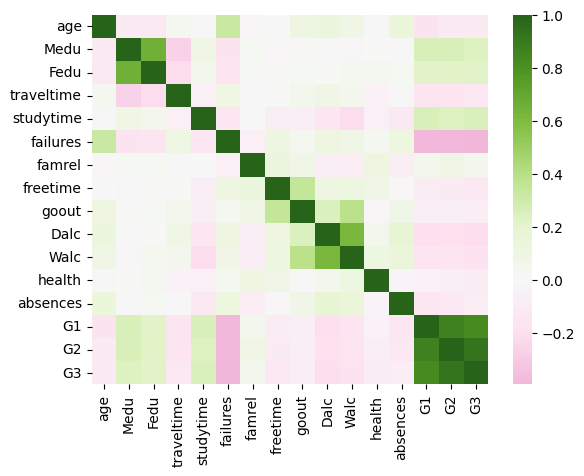

In [7]:
sns.heatmap(df.corr(), cmap='PiYG', center=0)

As we see, all numeric variables (except *failures*) are more or less weakly correlated with grades. 

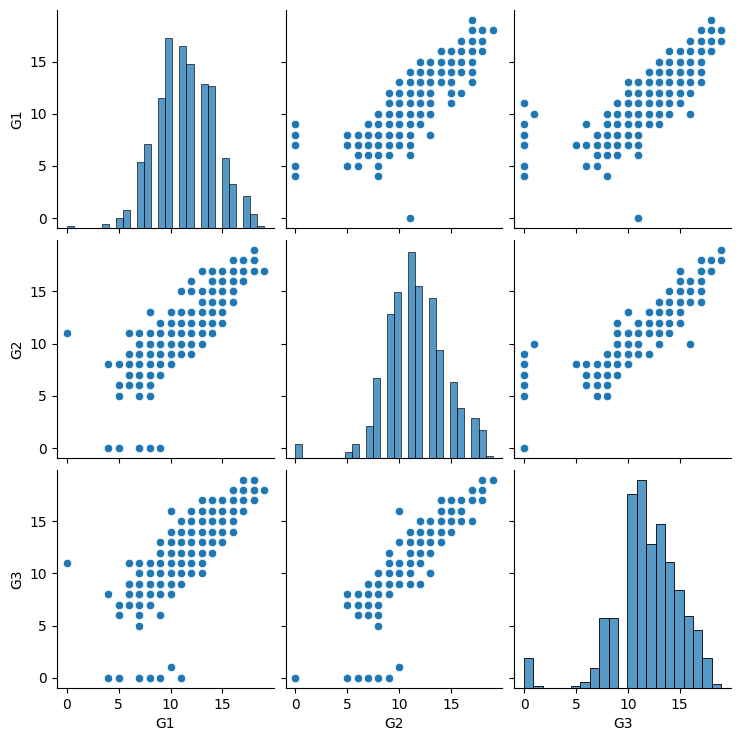

In [8]:
sns.pairplot(data=df[['G1', 'G2', 'G3']])

As G1, G2 and G3 grades have strong correlation, it makes no sense to separately include G1 and G2 in features for prediction. While there is a group of students that have non-zero G1 scores and zero G2 and G3 scores, we don't have enough information about the scoring system and for the sake of simplicity we wiil drop these columns before splitting.

<AxesSubplot:xlabel='G3', ylabel='Count'>

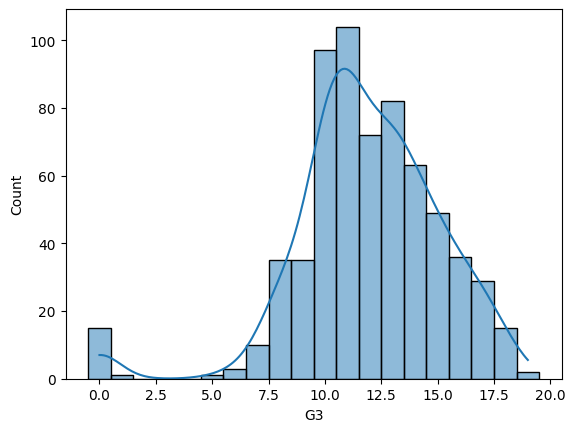

In [9]:
sns.histplot(data=df, x='G3', discrete=True, kde=True)

The distribution of target variable is slightly skewed with prominent zero spike, but doesn't need log transformation.

Let's now check some categorical variables for influence on G3 score

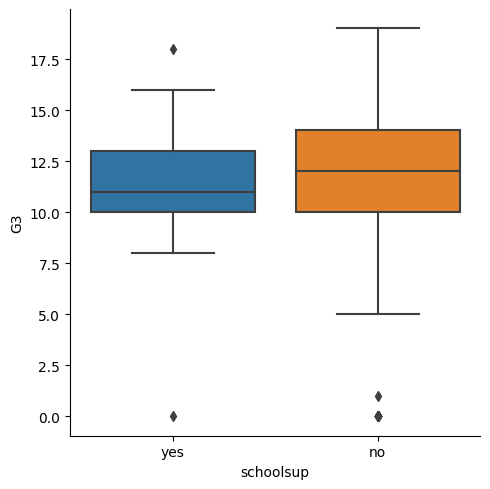

In [10]:
sns.catplot(data=df, x='schoolsup', y='G3', kind='box')

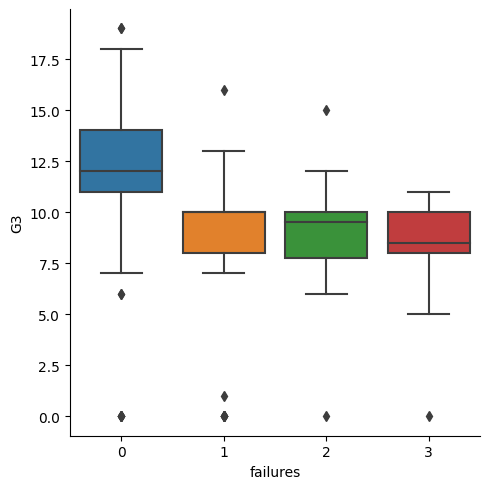

In [11]:
sns.catplot(data=df, x='failures', y='G3', kind='box')

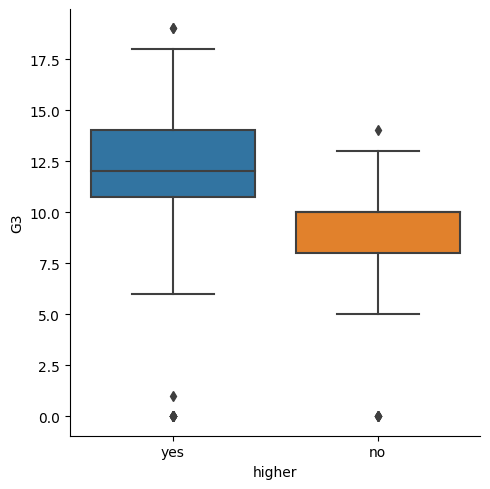

In [12]:
sns.catplot(data=df, x='higher', y='G3', kind='box')

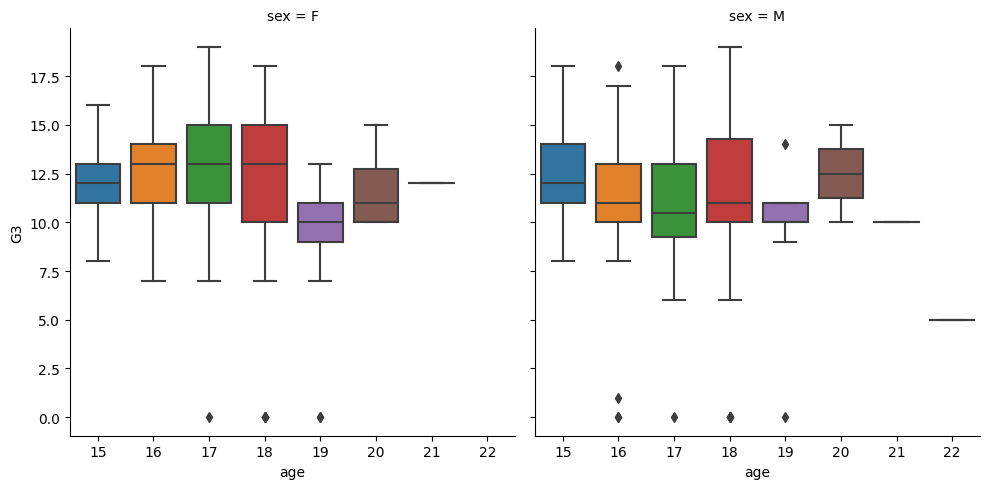

In [13]:
sns.catplot(data=df, x='age', y='G3', kind='box', col='sex')

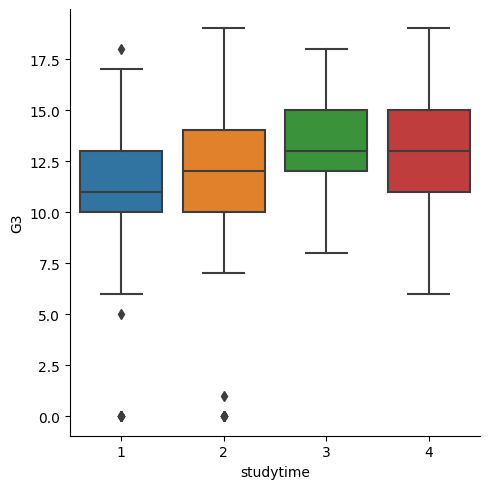

In [14]:
sns.catplot(data=df, x='studytime', y='G3', kind='box')

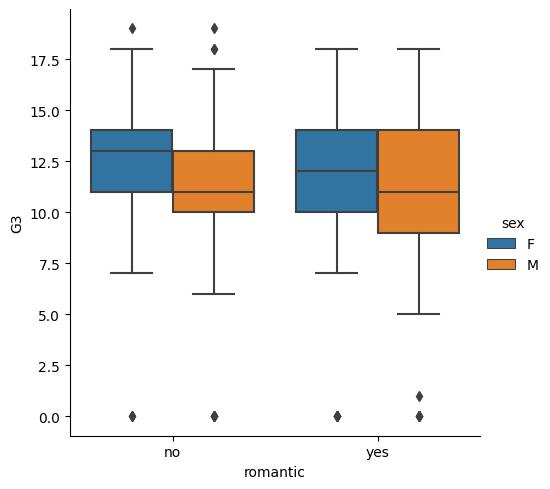

In [15]:
sns.catplot(data=df, x='romantic', y='G3', kind='box', hue='sex')

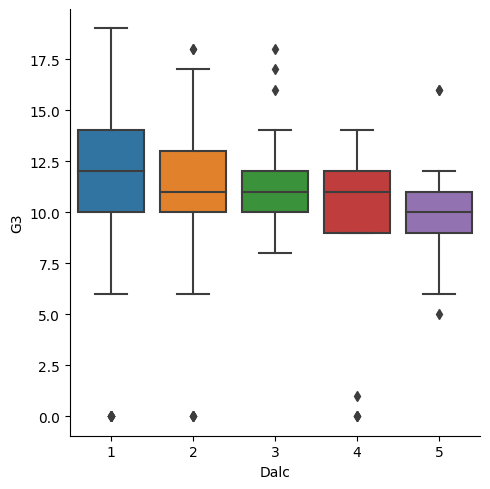

In [16]:
sns.catplot(data=df, x='Dalc', y='G3', kind='box')

Previous failures seems to have strong effect on final grade - none of students with 3 failures has passsing grade. 
There are also some features (schoolsup, higher, Dalc, etc) which seem to have strong impact on G3 grade. 
Later we'll confirm that by checking regression coefficients.

<AxesSubplot:xlabel='absences', ylabel='G3'>

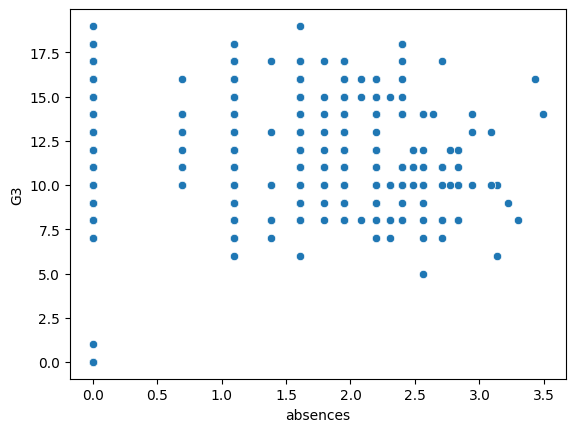

In [17]:
sns.scatterplot(x=np.log1p(df['absences']), y=df['G3'])

Surprisingly, absences count does not seem to have effect on a final grade

#### Data preparation for training

In [18]:
dv = DictVectorizer(sparse=False)

In [129]:
df_train, df_test, y_train, y_test = train_test_split(
    df.drop(['G1', 'G2', 'G3'], axis=1),
    df['G3'],
    test_size=0.2,
    random_state=100)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

df_train_dicts = df_train.to_dict(orient='records')
df_test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(df_train_dicts)
X_test = dv.transform(df_test_dicts)

#### Choosing the model

First model we will try is simple Linear Regression

In [20]:
lr = LinearRegression()

In [21]:
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

In [22]:
cvs = cross_val_score(lr, X_train, y_train, cv=5, scoring=rmse_scorer)
print(f'cross-validation rmse {-cvs.mean()} +- {cvs.std()}')

cross-validation rmse 2.8149305854233417 +- 0.3703489685626555


In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

2.730101997577358

In [25]:
lr.coef_

array([-1.89184206e-01,  1.89007737e-01, -3.50113826e+11, -3.50113826e+11,
       -3.50113826e+11, -3.50113826e+11, -3.50113826e+11, -1.81004087e-01,
        5.00462090e+11,  5.00462090e+11,  5.00462090e+11,  5.00462090e+11,
        5.00462090e+11,  2.69048344e+11,  2.69048344e+11, -7.75599461e-02,
       -1.77366037e-02,  4.11312666e+10,  4.11312666e+10, -6.59702026e+11,
       -6.59702026e+11,  1.46844227e-01, -1.46427587e+00,  1.38981365e-01,
       -7.11245680e+11, -7.11245680e+11,  1.41437188e+12,  1.41437188e+12,
       -2.71141042e-01,  4.02504358e-02,  1.39756691e+12,  1.39756691e+12,
        1.39756691e+12, -1.88842773e-01, -1.77592411e+11, -1.77592411e+11,
       -3.48679075e+11, -3.48679075e+11, -2.42963085e+11, -2.42963085e+11,
        2.72959088e+11,  2.72959088e+11,  1.85867889e+10,  1.85867889e+10,
        1.85867889e+10,  1.85867889e+10,  2.21435611e+11,  2.21435611e+11,
       -1.00999398e+11, -1.00999398e+11,  1.31832106e+12,  1.31832106e+12,
       -2.34235251e+11, -

RMSE is quite high, also coefficients are very large which indicates we might need to try the regularized model.

In [26]:
ridge = Ridge()

In [27]:
cvs = cross_val_score(ridge, X_train, y_train, cv=5, scoring=rmse_scorer)
print(f'{-cvs.mean()} +- {cvs.std()}')

2.8112851709316535 +- 0.3713969203647695


Let's try different alphas for Ridge regression

In [28]:
ridge_grid = GridSearchCV(
    ridge,
    {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    cv=5,
    scoring=rmse_scorer
    )

In [29]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False))

In [30]:
ridge_grid.best_estimator_

Ridge(alpha=10)

In [31]:
-ridge_grid.best_score_

2.7918544469608135

In [32]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [33]:
y_pred = ridge.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

2.6997875096325132

<AxesSubplot:xlabel='coef', ylabel='features'>

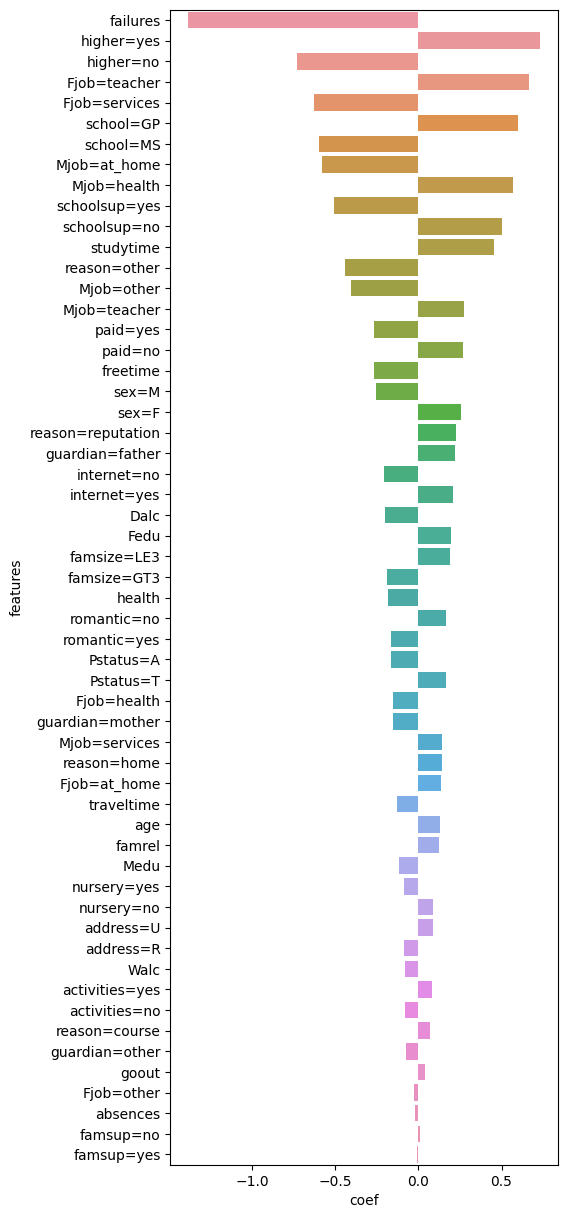

In [34]:
ridge_weights = pd.DataFrame({'features': dv.feature_names_, 'coef': ridge.coef_})
fig, ax = plt.subplots(figsize=(5, 15))
sns.barplot(data=ridge_weights.sort_values(by='coef', key=abs, ascending=False), x='coef', y='features')

RMSE is still high, but now we have some information about most important features

In [35]:
from sklearn.svm import SVR

In [36]:
svr = SVR(gamma='auto')

In [37]:
cvs = cross_val_score(svr, X_train, y_train, cv=5, scoring=rmse_scorer)
print(f'{-cvs.mean()} +- {cvs.std()}')

2.840180904068944 +- 0.4192850360870525


In [38]:
svr.fit(X_train, y_train)

SVR(gamma='auto')

In [39]:
y_pred_svr = svr.predict(X_test)
mean_squared_error(y_test, y_pred_svr, squared=False)

2.73580857455049

No improvement. Now let's try some tree-based model, which can also give some insight into feature importance

In [40]:
rf = RandomForestRegressor()

In [100]:
rf_grid = GridSearchCV(
    rf,
    {
        'max_depth': [2, 5, 10, 50, None],
        'min_samples_leaf': [0.01, 0.1, 0.5, 1],
        'n_estimators': [10, 50, 100]
    },
    cv=5,
    scoring=rmse_scorer
    )

In [42]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=10;, score=-2.930 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=10;, score=-2.616 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=10;, score=-3.394 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=10;, score=-2.267 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=10;, score=-2.892 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=50;, score=-2.917 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=50;, score=-2.569 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=50;, score=-3.377 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=0.01, n_estimators=50;, score=-2.302 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=0.01

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10, 50, None],
                         'min_samples_leaf': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=5)

In [43]:
rf_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 0.01, 'n_estimators': 100}

In [44]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=0.01)

In [45]:
-rf_grid.best_score_

2.7262452587457027

In [169]:
rf = RandomForestRegressor(min_samples_leaf=0.01, n_estimators=50, max_depth=50, random_state=100)

In [174]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf, squared=False)

2.5855200351910934

This gives us slightly better RMSE on test set. Now let's look on the feature importance

In [48]:
rf.feature_importances_

array([0.01844661, 0.03132981, 0.00050162, 0.        , 0.00848036,
       0.00773361, 0.0044038 , 0.03026719, 0.00644595, 0.0042087 ,
       0.00563319, 0.00289022, 0.00148347, 0.        , 0.00201598,
       0.04487873, 0.06716844, 0.00894932, 0.0057368 , 0.00605769,
       0.00791411, 0.02779696, 0.30821027, 0.01620549, 0.00455375,
       0.00475102, 0.01028645, 0.01149326, 0.02974373, 0.02747276,
       0.00580504, 0.00452446, 0.00076329, 0.03262222, 0.01647947,
       0.02796045, 0.007907  , 0.00537178, 0.00432761, 0.00336822,
       0.00100155, 0.        , 0.01124863, 0.00961514, 0.00897445,
       0.00628704, 0.00586553, 0.00353578, 0.03736327, 0.02879446,
       0.00559664, 0.0103557 , 0.00828749, 0.00764434, 0.0276325 ,
       0.01360865])

<AxesSubplot:xlabel='importance', ylabel='features'>

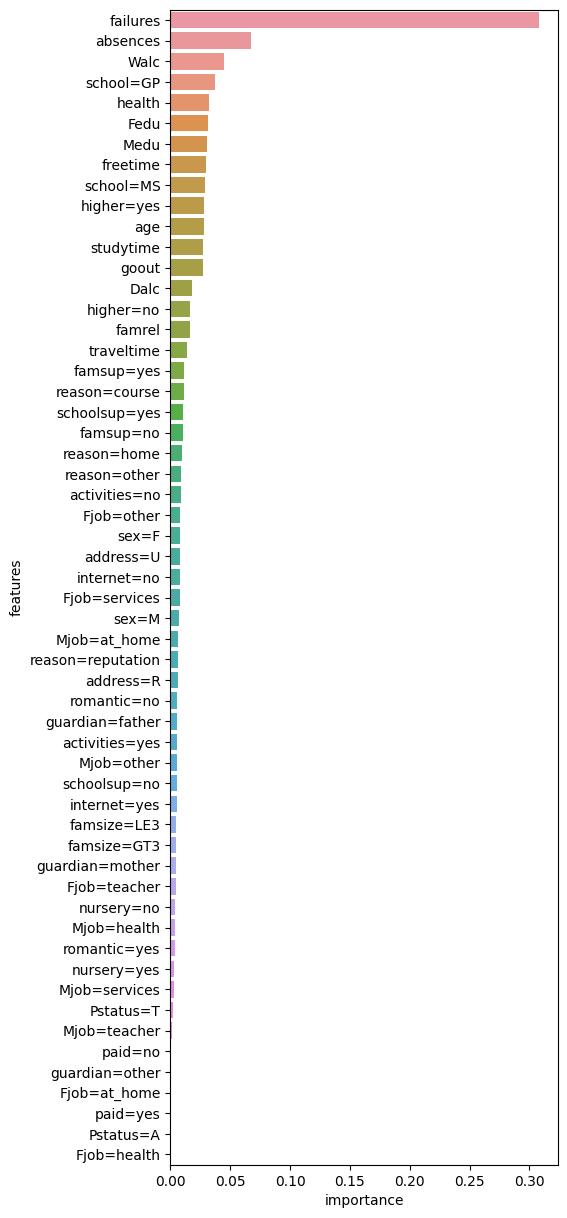

In [49]:
rf_feats = pd.DataFrame({'features': dv.feature_names_, 'importance': rf.feature_importances_})
fig, ax = plt.subplots(figsize=(5, 15))
sns.barplot(data=rf_feats.sort_values(by='importance', key=abs, ascending=False), x='importance', y='features')

Here the most important feature remains *failures*, while *absences*, which must be important by common sense is on the second place. It is interesting that absenses were not scored as important by linear models and did not make any reason with EDA. 

Also weekend alcohol consumption *Walc* (not daily as in linear model) is on the third place. *School*, *Fedu*, *Medu* remain important, and *freetime* and *health* also go up in rank.

In general, it seems that for these data, random forest model decisions more agrees with common sense conclusions about feature importance than simple linear models. Also it gives us the lowest error score.

Here is the code for getting json for deployed model testing

In [185]:
import json

In [192]:
json.dumps(df_test_dicts[2])

'{"school": "GP", "sex": "F", "age": 17, "address": "U", "famsize": "GT3", "Pstatus": "T", "Medu": 3, "Fedu": 2, "Mjob": "other", "Fjob": "other", "reason": "course", "guardian": "mother", "traveltime": 1, "studytime": 2, "failures": 0, "schoolsup": "no", "famsup": "no", "paid": "no", "activities": "yes", "nursery": "no", "higher": "yes", "internet": "yes", "romantic": "no", "famrel": 5, "freetime": 3, "goout": 4, "Dalc": 1, "Walc": 3, "health": 3, "absences": 2}'

In [191]:
y_test[2]

17